# StandardScaler
- What it does

StandardScaler transforms each feature so that it has:

* Mean = 0
* Standard deviation = 1
* Formula:

            𝑧 = (𝑥 − 𝜇)/ 𝜎

This is important for algorithms that are sensitive to feature scale (e.g., SVMs, logistic regression, k-means, neural networks).

In [49]:
import numpy as np # Linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('Social_Network_Ads.csv')

In [51]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [52]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [53]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [57]:
X_train

,User ID,Gender,Age,EstimatedSalary
157,15602373,1,29,75000
109,15697997,0,38,80000
17,15617482,1,45,26000
347,15768151,0,54,108000
24,15705113,1,46,23000
...,...,...,...,...
71,15726358,0,24,27000
106,15706185,0,26,35000
270,15680752,0,43,133000
348,15579212,1,39,77000


In [58]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
60     0
79     0
285    1
305    0
281    0
Name: Purchased, Length: 120, dtype: int64

# Applying Standard_Scaler

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [62]:
colum_name = scaler.get_feature_names_out()

In [63]:
colum_name

array(['User ID', 'Gender', 'Age', 'EstimatedSalary'], dtype=object)

# There are two way to add columns name after transfrom the data

In [64]:
X_train_scalled = pd.DataFrame(data=X_train_scalled, columns = colum_name)
X_test_scalled = pd.DataFrame(data=X_test_scalled, columns = X_test.columns)

In [65]:
X_test_scalled.head()

,User ID,Gender,Age,EstimatedSalary
0,0.126177,-0.978796,0.827784,-1.433827
1,-1.073472,-0.978796,2.105076,0.513775
2,1.210365,-0.978796,-0.940775,-0.784626
3,0.496809,-0.978796,1.024290,0.749848
4,0.151604,-0.978796,-0.842522,-1.256772


In [66]:
X_test_scalled.head()

,User ID,Gender,Age,EstimatedSalary
0,0.126177,-0.978796,0.827784,-1.433827
1,-1.073472,-0.978796,2.105076,0.513775
2,1.210365,-0.978796,-0.940775,-0.784626
3,0.496809,-0.978796,1.024290,0.749848
4,0.151604,-0.978796,-0.842522,-1.256772


In [67]:
np.round(X_train_scalled.describe(),2)

,User ID,Gender,Age,EstimatedSalary
count,280.00,280.00,280.00,280.00
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.62,-0.98,-1.92,-1.64
25%,-0.94,-0.98,-0.74,-0.78
50%,0.02,-0.98,-0.06,0.01
75%,0.84,1.02,0.73,0.51
max,1.74,1.02,2.20,2.34


In [68]:
np.round(X_test_scalled.describe(),2)

,User ID,Gender,Age,EstimatedSalary
count,120.00,120.00,120.00,120.00
mean,0.15,0.00,0.03,-0.08
std,0.92,1.00,1.10,1.02
min,-1.66,-0.98,-1.92,-1.61
25%,-0.63,-0.98,-0.87,-0.89
50%,0.14,-0.98,-0.06,-0.22
75%,0.94,1.02,0.93,0.45
max,1.72,1.02,2.20,2.34


Text(0, 0.5, 'Estimated Salary')

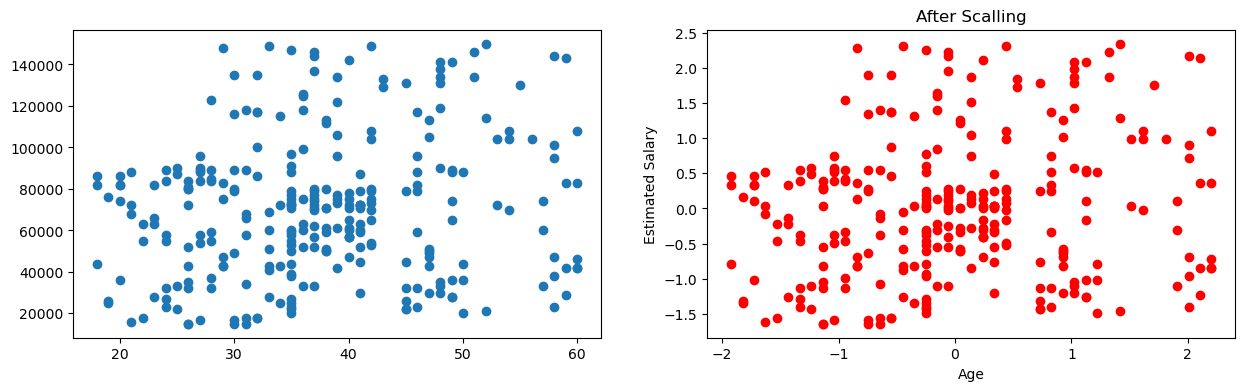

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (x1,x2) = plt.subplots(1, 2, figsize = (15, 4))
x1.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.title('After Scalling')
x2.scatter(X_train_scalled['Age'], X_train_scalled['EstimatedSalary'], color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

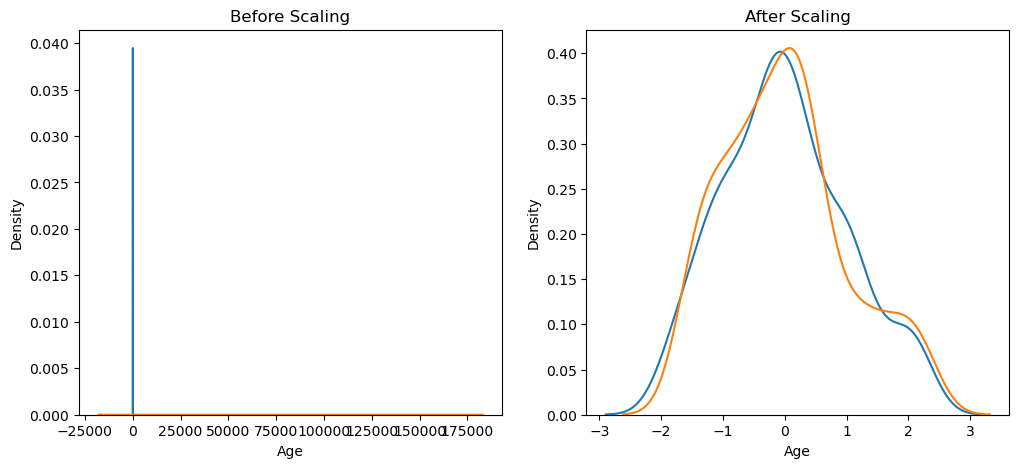

In [70]:
fig, (x1,x2) = plt.subplots(ncols = 2, figsize=(12,5))
# Before Scalling

x1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = x1)
sns.kdeplot(X_train['EstimatedSalary'], ax = x1)

x2.set_title("After Scaling")
sns.kdeplot(X_train_scalled['Age'], ax = x2)
sns.kdeplot(X_train_scalled['EstimatedSalary'], ax = x2)

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

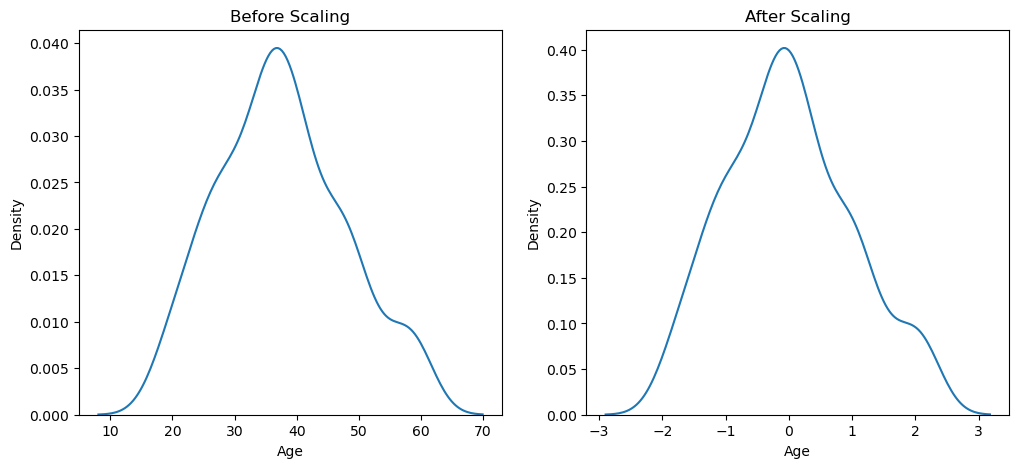

In [71]:
fig, (x1,x2) = plt.subplots(ncols = 2, figsize=(12,5))
# Before Scalling

x1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = x1)

x2.set_title("After Scaling")
sns.kdeplot(X_train_scalled['Age'], ax = x2)



<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

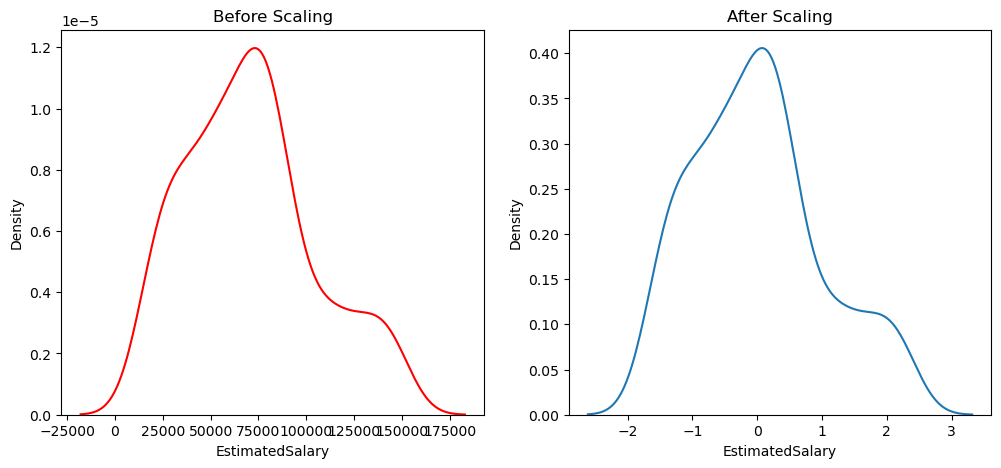

In [72]:
fig, (x1,x2) = plt.subplots(ncols = 2, figsize=(12,5))
# Before Scalling

x1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = x1, color='red')

x2.set_title("After Scaling")
sns.kdeplot(X_train_scalled['EstimatedSalary'], ax = x2)

# Why Scaling is important

In [73]:
from sklearn.linear_model import LogisticRegression

In [80]:
lg = LogisticRegression()
lg_scalled = LogisticRegression()

In [81]:
lg.fit(X_train,y_train)
lg_scalled.fit(X_train_scalled,y_train)

LogisticRegression()

In [85]:
y_pred = lg.predict(X_test)
y_pred_scalled = lg_scalled.predict(X_test_scalled)

In [86]:
from sklearn.metrics import accuracy_score

In [88]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test, y_pred_scalled))

0.85
0.8583333333333333
